# Inteactive Perceptron Tutorial

## You Will Learn
1. What can a perceptron learn?
2. How does a perceptron work?
3. Play with an interactive simulation to understand the effect of learning rate and number of epochs
4. What does a Perceptron can **not** learn? 

## Background

* The [perceptron](https://en.wikipedia.org/wiki/Perceptron) is an algorithm for supervised learning of a linear binary classifiers. 
* It dates back to the late 1950s and its first implementation, in custom hardware, was one of the first artificial neural networks to be produced. 

## Settings
* Data: a set of $n$ examples $\left\{x_i\right\}_{i=1}^{n}$ in $\mathbb{R^d}$ so that $x_i[j]$ is the $j$-th value of the $i$-th example.
* Labels: each point is associated with a label $y_i=\left\{-1,1\right\}$.
* Model: a set of weights $w[j], j\in[1,d]$ and a bias $b$ such that the estimated output is 
$\hat{y_i}=sign \left( \sum_{j=1}^{d}x_i[j]w[j] +b \right )$
## Problem
* How can one learn $w$?
## Solution
0. Init $w$ to be vector of zeros and $b$ as zero.
1. Iterate over examples
2. if $\hat{y_i}=y_i$ do nothing
3. if $\hat{y_i}\ne y_i$ update the weight vector toward the correct label:
$
\left\{
    \begin{array}{l}
        w'=w + \eta x_iy\\
        b'=b + \eta y
    \end{array}
\right.
$
## Intuition
If $\eta\rightarrow\infty$, then, after the update $\hat{y_i}=y_i$

## Demo

In [101]:
import numpy as np
%pylab inline
n=50
c1 = [3, 0]
c2 = [-3, 6]
w0 = np.array([1,1],dtype=float64)
b0 = 0

Populating the interactive namespace from numpy and matplotlib


In [102]:
def shuffle_examples(x,y, seed):
    np.random.seed(seed=seed)
    p = np.random.permutation(len(y))
    x = x[p,:]
    y = y[p]
    return x, y

def create_blob(c1=c1, c2=c2, seed=42):
    x=np.vstack((np.random.randn(n, 2) + c1, np.random.randn(n, 2) + c2))
    y=np.vstack((np.ones((n,1)), -np.ones((n,1))))
    x,y = shuffle_examples(x,y, seed=seed)
    return x, y

x,y = create_blob()

In [103]:
def perceptron_predict(x,w,b):
    a = np.dot(w,x) + b
    y_hat = np.sign(a)
    return y_hat

def perceptron_init(d):
    w = np.random.randn(1,d)
    b = 0
    return w,b

def perceptron_update(x,y,w,b,eta):
    y_hat = perceptron_predict(x,w,b)
    err = y_hat-y
    if y_hat==y:
        pass
    else:
        w+=eta*x*y
        b+=eta*y
    return w,b,err
def perceptron_learn(x, y, eta=0.01, n_epochs=3, w0=None, b0=None):
    d = x.shape[1]
    n = x.shape[0]
    # init
    if w0 is None:
        w, b = perceptron_init(d)
    else:
        w = w0.copy()
        b = b0
    num_epochs = int(n_epochs)
    epoch_frac = n_epochs - num_epochs
    for epoch in range(num_epochs+1):
        err_total = 0
        last_sample = n if epoch < num_epochs else int(epoch_frac*n)
        for i in range(last_sample):
            w, b,err = perceptron_update(x[i,:], y[i], w, b, eta)
            err_total += err
        err_mean = err_total/n
    return w, b
def plot_perceptron(x,y,w,b, edge = 10):
    w = w.ravel()
    plt.scatter(x[:,0],x[:,1], c=y.ravel())
    plt.axis('square')
    xlim = np.array([-edge, edge])
    plt.plot(xlim, -(xlim * w[0] + b)/w[1],'k')
    plt.xlim([-edge, edge])
    plt.ylim([-edge, edge])
    plt.title('w=%s,b=%s'%(w,b))

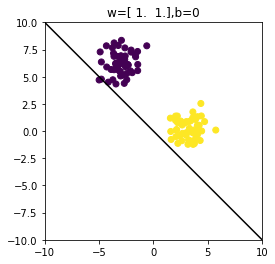

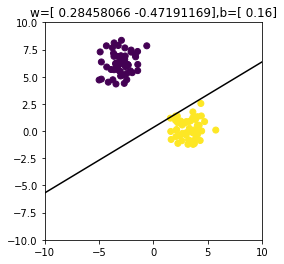

In [104]:
plt.figure(1)
plot_perceptron(x, y, w0,b0)
plt.figure(2)
w,b = perceptron_learn(x,y,w0=w,b0=b)
plot_perceptron(x, y, w,b)

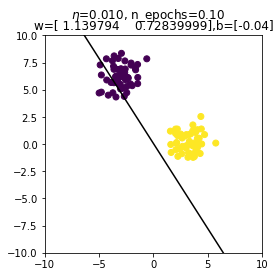

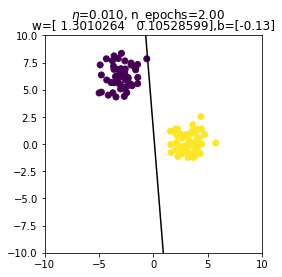

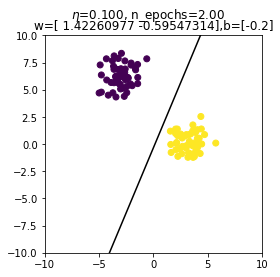

In [105]:
def experiment(eta=0.01, n_epochs=2.5):
    w,b = perceptron_learn(x, y, eta=eta, n_epochs=n_epochs, w0=w0,b0=b0)
    plot_perceptron(x,y,w,b)
    plt.suptitle('$\eta$=%3.3f, n_epochs=%3.2f' % (eta, n_epochs))
plt.figure()
experiment(0.01, 0.1)
plt.figure()
experiment(0.01, 2)
plt.figure()
experiment(0.1 , 2)

In [106]:
from ipywidgets import interact, IntSlider, FloatSlider
eta_slider = FloatSlider(value=0.01, step=0.01, max=1, min=0)
n_ephoch_slider= FloatSlider(value=0.1, step=0.1, max=3, min=0)
interact(experiment, eta=eta_slider, n_epochs=n_ephoch_slider)

A Jupyter Widget

<function __main__.experiment>